In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
fire_df = pd.read_csv("Resources/fire_data/fire_all_clean.csv", index_col="City_ID")
#fire_df.head()

,Name,Admin unit,County,Acres burned,Lon,Lat,Date extinguished,Date created,Duration (days),Year extinguished,Year,Month created (num),Month
City_ID,,,,,,,,,,,,,
0,Bridge Fire,Shasta-Trinity National Forest,Shasta,37.0,-122.309000,40.774000,2018-01-09,2017-10-31,70 days,2018,2017,10,October
1,Pala Fire,CAL FIRE San Diego Unit,San Diego,122.0,1.000000,1.000000,2009-05-25,2009-05-24,1 days,2009,2009,5,May
2,River Fire,CAL FIRE San Bernardino Unit,Inyo,407.0,-118.016510,36.602575,2013-02-28,2013-02-24,4 days,2013,2013,2,February
3,Fawnskin Fire,San Bernardino National Forest,San Bernardino,30.0,-116.941311,34.288877,2013-04-22,2013-04-20,2 days,2013,2013,4,April
4,Gold Fire,CAL FIRE Madera-Mariposa-Merced Unit,Madera,274.0,-119.635004,37.116295,2013-05-01,2013-04-30,1 days,2013,2013,4,April


In [47]:
rainfall_df = pd.read_csv("Resources/weather_data/rainfall_all_years_clean.csv", index_col="City_ID")
#rainfall_df.head()

In [46]:
temperature_df = pd.read_csv("Resources/weather_data/temperature_all_years_clean.csv", index_col="City_ID")
#temperature_df.info()

In [45]:
fire_vs_rainfall_all = pd.merge(rainfall_df, fire_df, on=["Month", "Year", "County"], how="outer")

In [44]:
#fire_vs_rainfall_all.info()

In [8]:
fire_vs_rainfall_df = fire_vs_rainfall_all.dropna()

In [48]:
fire_vs_rainfall_df.head()

,State,County,Rainfall (inches),Month,Year,Anomaly (1901-2000 base period),1901-2000 Mean,Name,Admin unit,Acres burned,Lon,Lat,Date extinguished,Date created,Duration (days),Year extinguished,Month created (num)
77,California,Madera,0.87,April,2013,-1.16,2.03,Gold Fire,CAL FIRE Madera-Mariposa-Merced Unit,274.0,-119.635004,37.116295,2013-05-01,2013-04-30,1 days,2013.0,4.0
85,California,Napa,1.05,April,2013,-0.86,1.91,Silverado Fire,CAL FIRE Sonoma-Lake-Napa Unit,75.0,-122.350844,38.441792,2013-05-01,2013-04-30,1 days,2013.0,4.0
93,California,San Bernardino,0.02,April,2013,-0.36,0.38,Fawnskin Fire,San Bernardino National Forest,30.0,-116.941311,34.288877,2013-04-22,2013-04-20,2 days,2013.0,4.0
126,California,Glenn,0.31,May,2013,-0.54,0.85,306 Fire,CAL FIRE Tehama-Glenn Unit,217.0,-122.560862,39.514139,2013-05-05,2013-05-01,4 days,2013.0,5.0
134,California,Los Angeles,0.55,May,2013,0.23,0.32,Lake Fire,CAL FIRE/Los Angeles County,712.0,-118.610044,34.491490,2013-05-18,2013-05-17,1 days,2013.0,5.0


In [28]:
# all years county key metrics

filter_county=fire_vs_rainfall_df.groupby(["County"]).count()

#groupby county
county_group = fire_vs_rainfall_df.groupby(["County", "Year", "Month"])

#create summary data frame per county
county_summary = county_group.agg(
    #count incidents
    incident_count=("County","count"), 
    
    #total acre burned
    total_acres_burned=("Acres burned", "sum"),
    
    #avg acres burned and round to whole number
    avg_acres_burned=("Acres burned", "mean"),
    
)

# convert 'total_acres_burned' and 'avg_acres_burned' to whole numbers/integer
county_summary['total_acres_burned'] = county_summary['total_acres_burned'].astype(int)
county_summary['avg_acres_burned'] = county_summary['avg_acres_burned'].round(0).astype(int)

#sort by descending incident count
#county_summary = county_summary.sort_values(by=["incident_count"], ascending=False)

county_summary.head()
county_series = filter_county["Name"].sort_values(ascending=False)

county_stat_all = county_series.agg(['mean', 'median', 'var', 'std', 'sem', 'max', 'min'])
county_stat_all

# top_county_list = county_series[county_series>60].index.tolist()
# print(top_county_list)

mean        33.122807
median      24.000000
var       1029.359649
std         32.083635
sem          4.249581
max        192.000000
min          1.000000
Name: Name, dtype: float64

In [29]:
top_county_list = county_series[county_series>60].index.tolist()
print(top_county_list)

['Riverside', 'San Diego', 'Kern', 'San Luis Obispo', 'Butte', 'Shasta', 'San Bernardino', 'Fresno', 'Siskiyou', 'Los Angeles', 'Tehama']


In [43]:
years = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023']
fire_vs_rainfall_df['Year'] = fire_vs_rainfall_df['Year'].astype(str)

year_dfs = {}

for x in years:
    if x in fire_vs_rainfall_df['Year'].values:
        # Filter data for the year
        year_dfs[f'df_{x}'] = fire_vs_rainfall_df.loc[fire_vs_rainfall_df["Year"] == x]

        # Aggregate data
        monthly_data = year_dfs[f'df_{x}'].groupby('Month').agg({
            'Rainfall (inches)': 'sum',  # Example aggregation
            'Acres burned': lambda x: (x.sum()/1000)        # Example aggregation
        })
        
year_dfs[df_2017].head()

/var/folders/_7/hzy3hwcs7q72sm8v1h1k2rq80000gn/T/ipykernel_2631/3083756467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_vs_rainfall_df['Year'] = fire_vs_rainfall_df['Year'].astype(str)


NameError: name 'df_2017' is not defined

In [41]:
county_dfs = {}  

for x in top_county_list:
    if x in fire_vs_rainfall_df['County'].values:
         # Filter data for the county
        county_dfs[f'df_{x}'] = year_dfs[df_2017].loc[year_dfs[df_2017]["County"] == x]

        # Aggregate data
        county_data = county_dfs[f'df_{x}'].groupby('Month').agg({
            'Rainfall (inches)': 'sum',  # Example aggregation
            'Acres burned': lambda x: (x.sum()/1000)        # Example aggregation
        })

NameError: name 'df_2017' is not defined

<Figure size 1200x800 with 0 Axes>

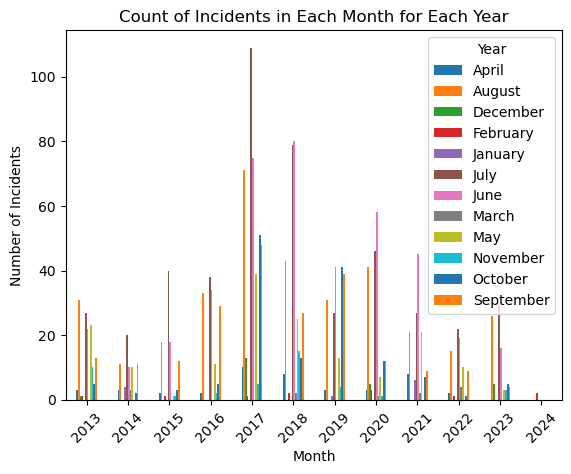

In [50]:
#relevant columns
monthly_data = fire_vs_rainfall_df[['Month','Year', 'Rainfall (inches)', 'Acres burned']]

grouped_by_year_month = monthly_data.groupby(['Year', 'Month'])
incidents_per_month_year = grouped_by_year_month.size()
incidents_per_month_year

plt.figure(figsize=(12, 8))
incidents_per_month_year.unstack().plot(kind='bar')
plt.title('Count of Incidents in Each Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()

In [51]:
#list(fire_vs_rainfall_df.columns)

In [60]:
clean_fire_rainfall = fire_vs_rainfall_df[[
 #'County',
 'Rainfall (inches)',
 'Month',
 'Year',
 'Acres burned',
 #'Duration (days)',
 #'Year extinguished',
 #'Month created (num)'
                                          ]]
#'Lon',
#'Lat',

#clean_fire_rainfall.head()

In [61]:
#Creating a new df for fire vs rainfall grouped by month
month_fire_rainfall = clean_fire_rainfall.groupby(["Month"])
month_fire_rainfall.head()

month_df = month_fire_rainfall.agg(
    #Sum rainfall
    sum_rainfall = ("Rainfall (inches)", "sum"),
    avg_rainfall = ("Rainfall (inches)", "mean"),

    sum_acres_burned = ("Acres burned", "sum"),
    avg_acres_burned = ("Acres burned", "mean")

)

month_df.reset_index(inplace=True)

#set months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#organize months
month_df['Month'] = pd.Categorical(month_df['Month'], categories=months, ordered=True)
month_df.sort_values(by='Month',inplace=True)  # same as you have now; can use inplace=True

month_df[['sum_acres_burned','avg_acres_burned']].astype(int)
month_df[['sum_rainfall', 'avg_rainfall']].round(2)
month_df

,Month,sum_rainfall,avg_rainfall,sum_acres_burned,avg_acres_burned
4,January,37.08,3.370909,4685.0,425.909091
3,February,34.75,3.159091,7347.0,667.909091
7,March,28.44,2.370000,2228.0,185.666667
0,April,53.17,1.208409,14373.0,326.659091
8,May,76.91,0.471840,121285.0,744.079755
6,June,66.12,0.158182,312778.0,748.272727
5,July,55.37,0.119075,1679930.0,3612.752688
1,August,70.51,0.206774,1698965.0,4982.302053
11,September,92.44,0.433991,381908.0,1792.995305
10,October,92.97,0.641172,275192.0,1897.875862


In [62]:
#Creating a new df for fire vs rainfall grouped by month
year_fire_rainfall = clean_fire_rainfall.groupby(["Year"])
year_fire_rainfall.head()

year_df = year_fire_rainfall.agg(
    #Sum rainfall
    sum_rainfall = ("Rainfall (inches)", "sum"),
    avg_rainfall = ("Rainfall (inches)", "mean"),

    sum_acres_burned = ("Acres burned", "sum"),
    avg_acres_burned = ("Acres burned", "mean")

)

year_df = year_df.round(0) 

year_df["avg_acres_burned(scaled_per_100)"] = year_df["avg_acres_burned"]/ 100
year_df

,sum_rainfall,avg_rainfall,sum_acres_burned,avg_acres_burned,avg_acres_burned(scaled_per_100)
Year,,,,,
2013,56.0,0.0,492134.0,3619.0,36.19
2014,31.0,0.0,288442.0,3898.0,38.98
2015,43.0,0.0,387163.0,4033.0,40.33
2016,44.0,0.0,446456.0,2899.0,28.99
2017,152.0,0.0,841581.0,1994.0,19.94
2018,116.0,0.0,590863.0,2010.0,20.10
2019,89.0,0.0,196347.0,982.0,9.82
2020,26.0,0.0,321100.0,1699.0,16.99
2021,80.0,1.0,776959.0,5322.0,53.22


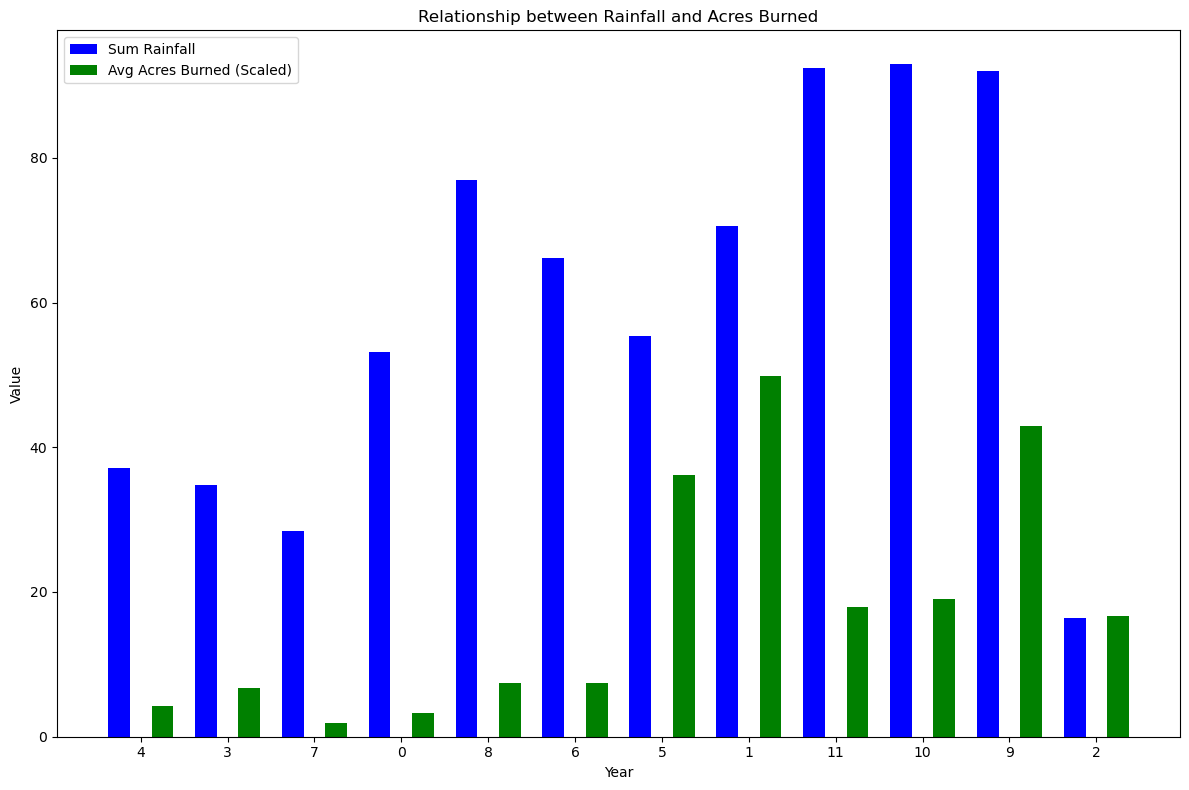

In [66]:
import matplotlib.pyplot as plt

# Data
years = month_df.index
sum_rainfall = month_df['sum_rainfall']
#sum_acres_burned = month_df['sum_acres_burned']
avg_acres_burned_scaled = month_df['avg_acres_burned'] / 100  # Scale the values by dividing by 100

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Width of each bar
bar_width = 0.25

# Positions for the bars
index = range(len(years))

# Plotting the bars
plt.bar(index, sum_rainfall, color='blue', width=bar_width, label='Sum Rainfall')
#plt.bar([i + bar_width for i in index], sum_acres_burned, color='orange', width=bar_width, label='Sum Acres Burned')
plt.bar([i + 2*bar_width for i in index], avg_acres_burned_scaled, color='green', width=bar_width, label='Avg Acres Burned (Scaled)')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Relationship between Rainfall and Acres Burned')
plt.xticks([i + bar_width for i in index], years)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


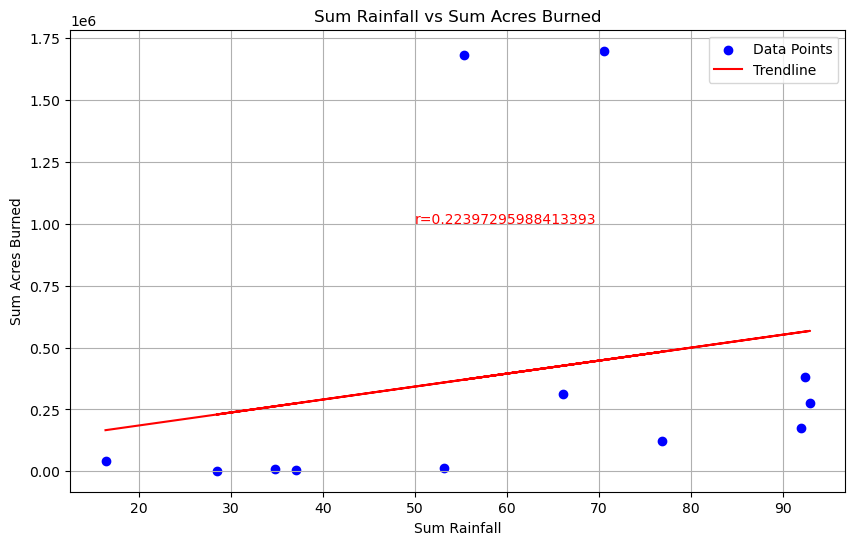

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Data
rainfall = month_df['sum_rainfall']
acres_burned = month_df['sum_acres_burned']

# Fit a trendline (linear regression)
#slope, intercept = np.polyfit(rainfall, acres_burned, 1)
result = stats.linregress(rainfall, acres_burned)
slope, intercept, r = result.slope, result.intercept, result.rvalue

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(rainfall, acres_burned, color='blue', label='Data Points')
plt.plot(rainfall, slope * rainfall + intercept, color='red', label='Trendline')

# Labels and title
plt.xlabel('Sum Rainfall')
plt.ylabel('Sum Acres Burned')
plt.title('Sum Rainfall vs Sum Acres Burned')
plt.legend()

plt.annotate(f'r={r}', (50, 1e6), color="r")

# Show plot
plt.grid(True)
plt.show()


# p value
# rsquared
#scikitlearn
# stat